In [93]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
df_yield = pd.read_csv('./data/yield.csv')
df_rainfall = pd.read_csv('./data/rainfall.csv')
df_temp = pd.read_csv('./data/temp.csv')
df_pesticides = pd.read_csv('./data/pesticides.csv')

In [95]:
# Rename columns for consistency
df_pesticides = df_pesticides.rename(columns={ 'Value': 'pesticides_tonnes'})

In [96]:
# Yield Data
print("Yield Data:\n", df_yield.head())
print("shape:", df_yield.shape)

Yield Data:
   Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400  
shape: (56717, 12)


In [97]:
df_yield.rename(columns={'Value': 'hectograms_per_hectare_yield'}, inplace=True)

In [98]:
# Drop unwanted columns 
df_yield = df_yield.drop(['Year Code', 'Element', 'Element Code', 'Area Code', 'Domain Code', 'Domain', 'Item Code', 'Unit'], axis=1)
df_yield.head()

,Area,Item,Year,hectograms_per_hectare_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [99]:
# Discribe data set
print("Yield Data Description:\n", df_yield.describe())

Yield Data Description:
                Year  hectograms_per_hectare_yield
count  56717.000000                  56717.000000
mean    1989.669570                  62094.660084
std       16.133198                  67835.932856
min     1961.000000                      0.000000
25%     1976.000000                  15680.000000
50%     1991.000000                  36744.000000
75%     2004.000000                  86213.000000
max     2016.000000                1000000.000000


In [100]:
# Check the data types
print("Yield Data Info:\n", df_yield.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Area                          56717 non-null  object
 1   Item                          56717 non-null  object
 2   Year                          56717 non-null  int64 
 3   hectograms_per_hectare_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ MB
Yield Data Info:
 None


In [101]:
# Rainfall Data
print("Rainfall Data:\n", df_rainfall.head())

Rainfall Data:
           Area  Year average_rain_fall_mm_per_year
0  Afghanistan  1985                           327
1  Afghanistan  1986                           327
2  Afghanistan  1987                           327
3  Afghanistan  1989                           327
4  Afghanistan  1990                           327


In [102]:
# Rename columns for consistency
df_rainfall.rename(columns={' Area': 'Area'}, inplace=True)

In [103]:
# Check the data types
print("Rainfall Data Info:\n", df_rainfall.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB
Rainfall Data Info:
 None


In [104]:
# Conver datatypes 
df_rainfall['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rainfall['average_rain_fall_mm_per_year'], errors='coerce')
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [105]:
# Drop null values
df_rainfall = df_rainfall.dropna()

In [106]:
# Describe data set
print("Rainfall Data Description:\n", df_rainfall.describe())

Rainfall Data Description:
               Year  average_rain_fall_mm_per_year
count  5947.000000                    5947.000000
mean   2001.365899                    1124.743232
std       9.526335                     786.257365
min    1985.000000                      51.000000
25%    1993.000000                     534.000000
50%    2001.000000                    1010.000000
75%    2010.000000                    1651.000000
max    2017.000000                    3240.000000


In [107]:
# Merge dataset yield and rainfall
df_yield_rainfall = pd.merge(df_yield, df_rainfall, on=['Area', 'Year'], how='inner')
df_yield_rainfall.head()

,Area,Item,Year,hectograms_per_hectare_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Maize,1986,16875,327.0
2,Afghanistan,Maize,1987,17020,327.0
3,Afghanistan,Maize,1989,16963,327.0
4,Afghanistan,Maize,1990,17582,327.0


In [108]:
# Shape and info of merged dataset
df_yield_rainfall.shape
df_yield_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25385 entries, 0 to 25384
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25385 non-null  object 
 1   Item                           25385 non-null  object 
 2   Year                           25385 non-null  int64  
 3   hectograms_per_hectare_yield   25385 non-null  int64  
 4   average_rain_fall_mm_per_year  25385 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 991.7+ KB


In [109]:
# Describe data set
print("Yiled and Rainfall Data Description:\n", df_yield_rainfall.describe())

Yiled and Rainfall Data Description:
                Year  hectograms_per_hectare_yield  \
count  25385.000000                  25385.000000   
mean    2001.278787                  68312.278353   
std        9.143915                  75213.292733   
min     1985.000000                     50.000000   
25%     1994.000000                  17432.000000   
50%     2001.000000                  38750.000000   
75%     2009.000000                  94286.000000   
max     2016.000000                 554855.000000   

       average_rain_fall_mm_per_year  
count                   25385.000000  
mean                     1254.849754  
std                       804.449430  
min                        51.000000  
25%                       630.000000  
50%                      1150.000000  
75%                      1761.000000  
max                      3240.000000  


In [110]:
# Check the pesticides dataset 
print("Pesticides Data:\n", df_pesticides.head())

Pesticides Data:
            Domain     Area Element                Item  Year  \
0  Pesticides Use  Albania     Use  Pesticides (total)  1990   
1  Pesticides Use  Albania     Use  Pesticides (total)  1991   
2  Pesticides Use  Albania     Use  Pesticides (total)  1992   
3  Pesticides Use  Albania     Use  Pesticides (total)  1993   
4  Pesticides Use  Albania     Use  Pesticides (total)  1994   

                           Unit  pesticides_tonnes  
0  tonnes of active ingredients              121.0  
1  tonnes of active ingredients              121.0  
2  tonnes of active ingredients              121.0  
3  tonnes of active ingredients              121.0  
4  tonnes of active ingredients              201.0  


In [111]:
# Drop unnecessary columns
df_pesticides = df_pesticides.drop(['Domain', 'Element', 'Unit', 'Item'], axis=1)
df_pesticides.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [112]:
#rename columns for consistency
df_pesticides.rename(columns={'Value': 'pesticides_value'}, inplace=True)
df_pesticides.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [113]:
# describe data set
print("Pesticides Data Description:\n", df_pesticides.describe())

Pesticides Data Description:
               Year  pesticides_tonnes
count  4349.000000       4.349000e+03
mean   2003.138883       2.030334e+04
std       7.728044       1.177362e+05
min    1990.000000       0.000000e+00
25%    1996.000000       9.300000e+01
50%    2003.000000       1.137560e+03
75%    2010.000000       7.869000e+03
max    2016.000000       1.807000e+06


In [114]:
# info of pesticides dataset
print("Pesticides Data Info:\n", df_pesticides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.1+ KB
Pesticides Data Info:
 None


In [115]:
# Merge dataset merge 
df_yield_rainfall_pesticides = pd.merge(df_yield_rainfall, df_pesticides, on=['Area', 'Year'], how='inner')
df_yield_rainfall_pesticides.head()

,Area,Item,Year,hectograms_per_hectare_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Maize,1991,29068,1485.0,121.0
2,Albania,Maize,1992,24876,1485.0,121.0
3,Albania,Maize,1993,24185,1485.0,121.0
4,Albania,Maize,1994,25848,1485.0,201.0


In [116]:
# Tempurature Data
print("Temperature Data:\n", df_temp.head())

Temperature Data:
    year        country  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
3  1852  Côte D'Ivoire       NaN
4  1853  Côte D'Ivoire       NaN


In [117]:
# Describe data set
print("Temperature Data Description:\n", df_temp.describe())

Temperature Data Description:
                year      avg_temp
count  71311.000000  68764.000000
mean    1905.799007     16.183876
std       67.102099      7.592960
min     1743.000000    -14.350000
25%     1858.000000      9.750000
50%     1910.000000     16.140000
75%     1962.000000     23.762500
max     2013.000000     30.730000


In [118]:
# Rename columns for consistency
df_temp.rename(columns={'year': 'Year', 'country': 'Area'}, inplace=True)
df_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [119]:
# Merge datset with yield, rainfall and pesticides
df_final = pd.merge(df_yield_rainfall_pesticides, df_temp, on=['Area', 'Year'], how='inner')
df_final.head()

,Area,Item,Year,hectograms_per_hectare_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Maize,1991,29068,1485.0,121.0,15.36
2,Albania,Maize,1992,24876,1485.0,121.0,16.06
3,Albania,Maize,1993,24185,1485.0,121.0,16.05
4,Albania,Maize,1994,25848,1485.0,201.0,16.96


In [120]:
# Shape and info of final dataset
print("Final Dataset Shape:", df_final.shape)

Final Dataset Shape: (28242, 7)


In [121]:
# Describe data set
print("Rainfall Data Description:\n", df_rainfall.describe())

Rainfall Data Description:
               Year  average_rain_fall_mm_per_year
count  5947.000000                    5947.000000
mean   2001.365899                    1124.743232
std       9.526335                     786.257365
min    1985.000000                      51.000000
25%    1993.000000                     534.000000
50%    2001.000000                    1010.000000
75%    2010.000000                    1651.000000
max    2017.000000                    3240.000000


In [122]:
# Check for null values
print("Final datset null value", df_final.isnull().sum())

Final datset null value Area                             0
Item                             0
Year                             0
hectograms_per_hectare_yield     0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [123]:
df_final.groupby('Item').count()

,Area,Year,hectograms_per_hectare_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [124]:
# Describe data set
print("Final Data Description:\n", df_final.describe())

Final Data Description:
                Year  hectograms_per_hectare_yield  \
count  28242.000000                  28242.000000   
mean    2001.544296                  77053.332094   
std        7.051905                  84956.612897   
min     1990.000000                     50.000000   
25%     1995.000000                  19919.250000   
50%     2001.000000                  38295.000000   
75%     2008.000000                 104676.750000   
max     2013.000000                 501412.000000   

       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
count                    28242.00000       28242.000000  28242.000000  
mean                      1149.05598       37076.909344     20.542627  
std                        709.81215       59958.784665      6.312051  
min                         51.00000           0.040000      1.300000  
25%                        593.00000        1702.000000     16.702500  
50%                       1083.00000       17529.440000     21.51

In [125]:
df_final['Area'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [126]:
df_final.groupby(['Area'],sort=True)['hectograms_per_hectare_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hectograms_per_hectare_yield, dtype: int64

In [127]:
df_final.groupby(['Item', 'Area'],sort=True)['hectograms_per_hectare_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hectograms_per_hectare_yield, dtype: int64

In [138]:
# Check the number of duplicated rows
print("Number of duplicated rows in final dataset:", df_final.duplicated().sum())

# Check the missing values
print("Missing values in final dataset:\n", df_final.isnull().sum())

Number of duplicated rows in final dataset: 3
Missing values in final dataset:
 Area                             0
Item                             0
hectograms_per_hectare_yield     0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [129]:
# Remove duplicated rows
df_final = df_final.drop_duplicates()
# Check the number of duplicated rows after removal
print("Number of duplicated rows in final dataset after removal:", df_final.duplicated().sum())

Number of duplicated rows in final dataset after removal: 0


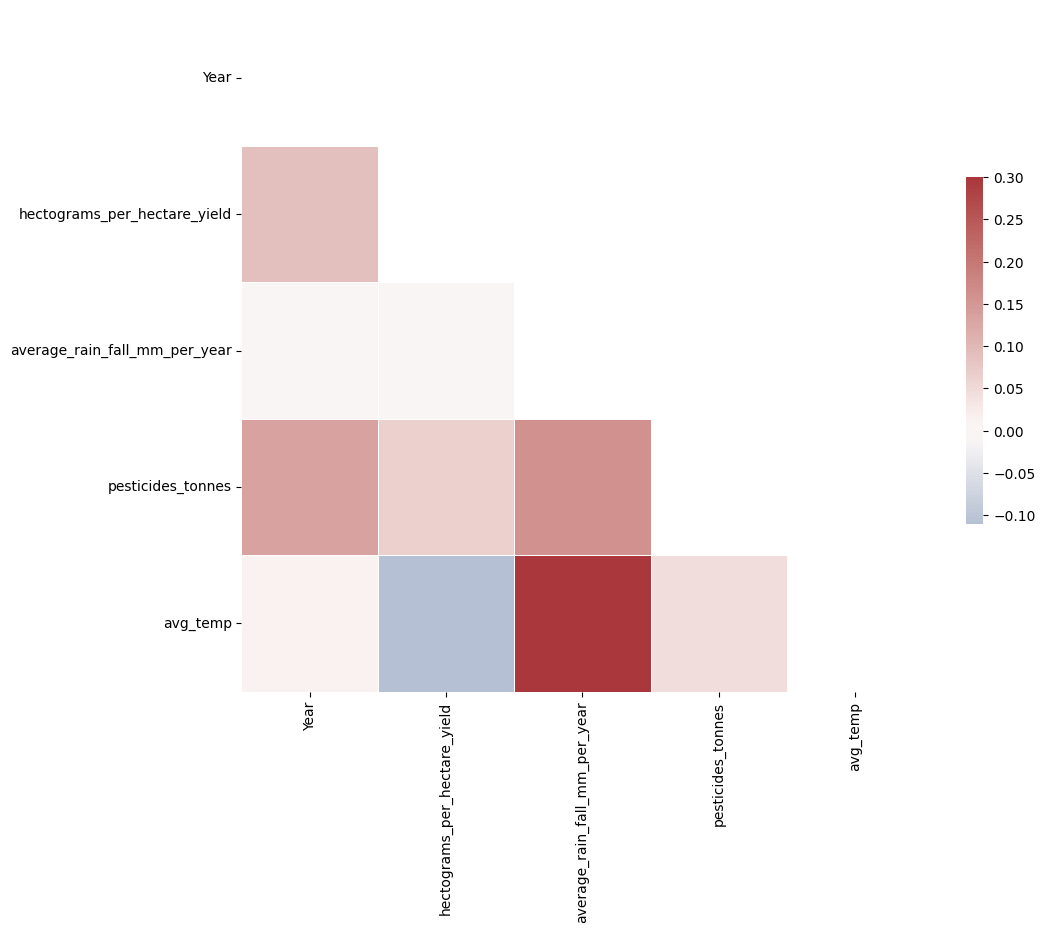

In [130]:
correlation_data=df_final.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.palette="vlag"

sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [131]:

df_final = df_final.drop(['Year'] , axis=1)
yield_df_onehot = pd.get_dummies(df_final, columns=['Area', "Item"], prefix=['Country', "Item"])
features = yield_df_onehot.loc[:, yield_df_onehot.columns != 'hectograms_per_hectare_yield']
label = df_final['hectograms_per_hectare_yield']
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485.0,121.0,15.36,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1485.0,121.0,16.06,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1485.0,121.0,16.05,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1485.0,201.0,16.96,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [132]:
# shape of features and label
print("Features Shape:", features.shape)

Features Shape: (25932, 114)


In [133]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [134]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [135]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)    
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 188621154.3701449
R^2 Score: 0.9745012927097156


Text(0.5, 1.0, 'Actual vs Predicted Yield')

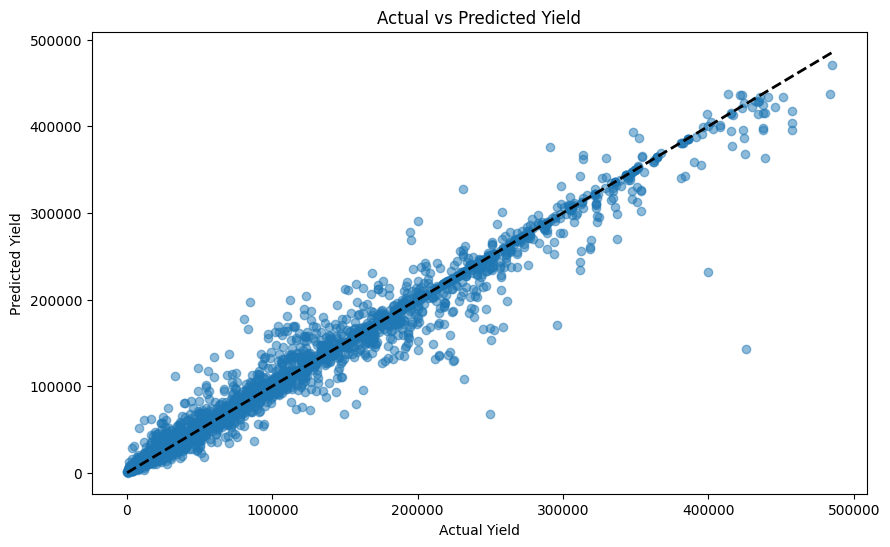

In [136]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')